**Problem Statement**

**Objective**


You are given a data of Instagram and their sentiment. The task is to do sentiment analysis about the problems of each major Instagram user. Instagram data contributors were asked to first classify positive, negative, and neutral posts, followed by categorizing negative reasons (such as "Category" or "Posts").

In [ ]:
#importing req. Lib.
import numpy as np
import pandas as pd
import sklearn
import sklearn.datasets as ds
import sklearn.model_selection as ms
import sklearn.svm as svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
#load our data set
test = pd.read_csv("/content/test.csv")
train = pd.read_csv("/content/train.csv")
valid = pd.read_csv("/content/valid.csv")

In [ ]:
test.shape

(30, 34)

In [ ]:
train.shape

(30, 34)

In [ ]:
valid.shape

(30, 34)

In [ ]:
#looking into our data
test.head()

,timestamp,account,fbid,id,followers,posts_count,following,profile_image_link,highlights_count,biography,...,avatar_cached,is_business_account,is_professional_account,is_verified,business_email,business_address_json,changelog,is_private,is_leading_business,is_music
0,2022-09-22,09sergeevna,17841401883212726,1454526773,70737,115,600,https://scontent-iev1-1.cdninstagram.com/v/t51...,3,NaN,...,NaN,False,True,False,NaN,NaN,NaN,False,NaN,NaN
1,2022-09-22,09sharkboy,17841401330493776,1521708349,237206,58,555,https://scontent-jnb1-1.cdninstagram.com/v/t51...,5,"Toronto, Canada 🇨🇦 @sharksgarage @sharkmerch",...,NaN,True,True,False,NaN,NaN,NaN,False,NaN,NaN
2,2022-09-22,09t3,17841402160815485,2203880027,19596,4,227,https://scontent-sjc3-1.cdninstagram.com/v/t51...,5,#Eminem,...,NaN,False,False,False,NaN,NaN,NaN,False,NaN,NaN
3,2022-09-22,09ubl,17841404001283540,3868325376,15522,39,40,https://instagram.fiev8-2.fna.fbcdn.net/v/t51....,5,كآإن' يٓ 'مآإكَان♥♪♔,...,NaN,True,True,False,NaN,NaN,NaN,False,NaN,NaN
4,2022-09-22,09unspeakamoose,17841405795541837,5934697184,74449,388,53,https://z-p42-instagram.flim3-2.fna.fbcdn.net/...,7,🎮|YouTube - 09um\n👀| use #09umsquad,...,NaN,False,True,False,NaN,NaN,NaN,False,NaN,NaN


In [ ]:
#checking last 5 entries
test.tail()

,timestamp,account,fbid,id,followers,posts_count,following,profile_image_link,highlights_count,biography,...,avatar_cached,is_business_account,is_professional_account,is_verified,business_email,business_address_json,changelog,is_private,is_leading_business,is_music
25,2022-09-11,01homeless,17841401915605406,986047853,15862,1038,1140,https://scontent-ord5-1.cdninstagram.com/v/t51...,1,I'm homeless. Moving everyday as a Vanlifer to...,...,NaN,False,True,False,NaN,NaN,NaN,False,NaN,NaN
26,2022-09-18,01i.5,17841404092918786,4230288430,58014,8,574,https://instagram.fsin3-1.fna.fbcdn.net/v/t51....,9,:🦋\n-كُلهــم لحظـة ،وانــتَي العُمـر گلـه ➷\n...,...,NaN,False,False,False,NaN,NaN,NaN,False,NaN,NaN
27,2022-09-22,0__j,17841403425330963,3527706177,28911,2,88,https://instagram.fdcf1-1.fna.fbcdn.net/v/t51....,27,‎⏳⌛️>أتْعٍاٌطًيٌـ اٌلِـمِـخًدّرُاٌتْ عٍﻧَدّمِـ...,...,NaN,False,False,False,NaN,NaN,NaN,False,NaN,NaN
28,2022-09-22,0_.750,17841444390477322,44298583682,23772,81,123,https://instagram.frgn4-1.fna.fbcdn.net/v/t51....,11,🥀ياأيها الزائر صلي على الحبيب محمد\n🤍🧿💙\nTikTo...,...,NaN,False,True,False,NaN,NaN,NaN,False,NaN,NaN
29,2021-08-21,0502_sori,17841402881477691,2941528049,15589,940,839,https://instagram.flba3-1.fna.fbcdn.net/v/t51....,6,ᴘᴇʀsᴏɴᴀʟ🏋🏻️ᴛʀᴀɪɴᴇʀ\nʙɪᴋɪɴɪ❤️\n.\n.\n#상암동\n#비포에...,...,avatar_0502_sori.jpg,False,True,False,NaN,NaN,NaN,False,NaN,NaN


In [ ]:
#checking columns in our data
test.columns

Index(['timestamp', 'account', 'fbid', 'id', 'followers', 'posts_count',
       'following', 'profile_image_link', 'highlights_count', 'biography',
       'avg_engagement', 'posts', 'profile_name', 'full_name', 'highlights',
       'category_name', 'post_hashtags', 'external_url', 'country_code',
       'region', 'business_category_name', 'bio_hashtags', 'category_enum',
       'maybe_country_codes', 'avatar_cached', 'is_business_account',
       'is_professional_account', 'is_verified', 'business_email',
       'business_address_json', 'changelog', 'is_private',
       'is_leading_business', 'is_music'],
      dtype='object')

In [ ]:
#checking info our data
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   timestamp                30 non-null     object 
 1   account                  30 non-null     object 
 2   fbid                     30 non-null     int64  
 3   id                       30 non-null     int64  
 4   followers                30 non-null     int64  
 5   posts_count              30 non-null     int64  
 6   following                30 non-null     int64  
 7   profile_image_link       30 non-null     object 
 8   highlights_count         30 non-null     int64  
 9   biography                27 non-null     object 
 10  avg_engagement           26 non-null     float64
 11  posts                    26 non-null     object 
 12  profile_name             25 non-null     object 
 13  full_name                23 non-null     object 
 14  highlights               22 

In [ ]:
#checking unique values
test.nunique()

timestamp                   6
account                    30
fbid                       30
id                         30
followers                  30
posts_count                24
following                  29
profile_image_link         30
highlights_count           18
biography                  27
avg_engagement             25
posts                      26
profile_name               25
full_name                  23
highlights                 22
category_name              17
post_hashtags              16
external_url               10
country_code                5
region                      2
business_category_name      3
bio_hashtags                4
category_enum               3
maybe_country_codes         3
avatar_cached               1
is_business_account         2
is_professional_account     2
is_verified                 1
business_email              0
business_address_json       0
changelog                   0
is_private                  2
is_leading_business         0
is_music  

In [ ]:
#checking null values in our data
test.isnull().sum()

timestamp                   0
account                     0
fbid                        0
id                          0
followers                   0
posts_count                 0
following                   0
profile_image_link          0
highlights_count            0
biography                   3
avg_engagement              4
posts                       4
profile_name                5
full_name                   7
highlights                  8
category_name              11
post_hashtags              14
external_url               20
country_code               21
region                     21
business_category_name     24
bio_hashtags               26
category_enum              27
maybe_country_codes        27
avatar_cached              29
is_business_account         0
is_professional_account     0
is_verified                 0
business_email             30
business_address_json      30
changelog                  30
is_private                  1
is_leading_business        30
is_music  

In [ ]:
#looking our data
train.head()

,timestamp,account,fbid,id,followers,posts_count,business_category_name,following,profile_image_link,highlights_count,...,changelog,is_business_account,is_professional_account,is_verified,business_email,business_address_json,is_private,bio_hashtags,is_leading_business,is_music
0,2022-09-18,01_mirabyan_01,17841403756639154,3673237221,4859,5,Creators & Celebrities,83,https://instagram.fcmb4-2.fna.fbcdn.net/v/t51....,2,...,NaN,True,True,False,NaN,NaN,False,NaN,NaN,NaN
1,2022-09-18,01_mirbek,17841406611302759,6662076376,758,2,Creators & Celebrities,153,https://instagram.ftir2-1.fna.fbcdn.net/v/t51....,2,...,NaN,True,True,False,NaN,NaN,False,NaN,NaN,NaN
2,2022-09-18,01_mishanya_volos_09,17841433964763991,34031932158,885,17,Creators & Celebrities,3744,https://scontent-ord5-1.cdninstagram.com/v/t51...,0,...,NaN,True,True,False,NaN,NaN,False,NaN,NaN,NaN
3,2022-09-18,01_miss_krasata_00,17841408404030959,8487672134,368,22,Home Services,1746,https://instagram.ftun1-2.fna.fbcdn.net/v/t51....,2,...,NaN,True,True,False,NaN,NaN,False,NaN,NaN,NaN
4,2022-09-18,01_mix_01,17841421581497624,21420999383,26,34,Creators & Celebrities,46,https://instagram.fgua3-4.fna.fbcdn.net/v/t51....,0,...,NaN,True,True,False,NaN,NaN,False,NaN,NaN,NaN


In [ ]:
#checking last 5 entries
train.tail()

,timestamp,account,fbid,id,followers,posts_count,business_category_name,following,profile_image_link,highlights_count,...,changelog,is_business_account,is_professional_account,is_verified,business_email,business_address_json,is_private,bio_hashtags,is_leading_business,is_music
25,2022-09-18,01_mr_cute_aditya_01,17841446344241374,46330992808,28,7,Publishers,205,https://scontent-lga3-1.cdninstagram.com/v/t51...,3,...,NaN,True,True,False,NaN,NaN,False,NaN,NaN,NaN
26,2022-09-18,01_mr_jangra,17841445836425063,45800511880,740,18,Creators & Celebrities,1814,https://instagram.fpbc1-2.fna.fbcdn.net/v/t51....,8,...,NaN,True,True,False,NaN,NaN,False,NaN,NaN,NaN
27,2021-09-08,01_mr_mad_akash,17841409057390143,8881149913,84,0,Personal Goods & General Merchandise Stores,439,https://scontent-iad3-1.cdninstagram.com/v/t51...,1,...,NaN,True,True,False,NaN,NaN,False,NaN,NaN,NaN
28,2022-09-18,01_mso_01,17841421498416816,21574532613,198,15,Personal Goods & General Merchandise Stores,252,https://instagram.fkno3-1.fna.fbcdn.net/v/t51....,0,...,NaN,True,True,False,NaN,NaN,False,NaN,NaN,NaN
29,2022-09-18,01_mstila_01,17841406813857913,6863307128,47,6,Creators & Celebrities,1608,https://scontent-lax3-2.cdninstagram.com/v/t51...,0,...,NaN,True,True,False,NaN,NaN,False,NaN,NaN,NaN


In [ ]:
#checking columns in our data
train.columns

Index(['timestamp', 'account', 'fbid', 'id', 'followers', 'posts_count',
       'business_category_name', 'following', 'profile_image_link',
       'highlights_count', 'category_name', 'avg_engagement', 'posts',
       'profile_name', 'full_name', 'category_enum', 'biography', 'highlights',
       'post_hashtags', 'country_code', 'region', 'maybe_country_codes',
       'external_url', 'avatar_cached', 'changelog', 'is_business_account',
       'is_professional_account', 'is_verified', 'business_email',
       'business_address_json', 'is_private', 'bio_hashtags',
       'is_leading_business', 'is_music'],
      dtype='object')

In [ ]:
#checking info our data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   timestamp                30 non-null     object 
 1   account                  30 non-null     object 
 2   fbid                     30 non-null     int64  
 3   id                       30 non-null     int64  
 4   followers                30 non-null     int64  
 5   posts_count              30 non-null     int64  
 6   business_category_name   30 non-null     object 
 7   following                30 non-null     int64  
 8   profile_image_link       30 non-null     object 
 9   highlights_count         30 non-null     int64  
 10  category_name            27 non-null     object 
 11  avg_engagement           26 non-null     float64
 12  posts                    26 non-null     object 
 13  profile_name             26 non-null     object 
 14  full_name                26 

In [ ]:
#checking unique values
train.nunique()

timestamp                   4
account                    30
fbid                       30
id                         30
followers                  30
posts_count                23
business_category_name      7
following                  30
profile_image_link         30
highlights_count           10
category_name              19
avg_engagement             26
posts                      26
profile_name               26
full_name                  26
category_enum              14
biography                  21
highlights                 16
post_hashtags              11
country_code                6
region                      2
maybe_country_codes         4
external_url                3
avatar_cached               2
changelog                   1
is_business_account         1
is_professional_account     1
is_verified                 1
business_email              0
business_address_json       0
is_private                  1
bio_hashtags                0
is_leading_business         0
is_music  

In [ ]:
#checking null values in our data
train.isnull().sum()

timestamp                   0
account                     0
fbid                        0
id                          0
followers                   0
posts_count                 0
business_category_name      0
following                   0
profile_image_link          0
highlights_count            0
category_name               3
avg_engagement              4
posts                       4
profile_name                4
full_name                   4
category_enum               8
biography                   9
highlights                 14
post_hashtags              19
country_code               20
region                     20
maybe_country_codes        26
external_url               27
avatar_cached              28
changelog                  29
is_business_account         0
is_professional_account     0
is_verified                 0
business_email             30
business_address_json      30
is_private                  0
bio_hashtags               30
is_leading_business        30
is_music  

In [ ]:
#looking into our data
valid.head()

,timestamp,account,fbid,id,followers,posts_count,following,profile_image_link,highlights_count,profile_name,...,changelog,bio_hashtags,is_business_account,is_professional_account,is_verified,business_email,business_address_json,is_private,is_leading_business,is_music
0,2022-09-22,057755ssssddddd,17841400889192382,1432477639,120,172,408,https://scontent-dub4-1.cdninstagram.com/v/t51...,0,عبدالعزيز الهذلي,...,NaN,NaN,False,False,False,NaN,NaN,False,NaN,NaN
1,2022-09-22,05777zm,17841400987734300,915232924,85,153,413,https://instagram.fdps5-1.fna.fbcdn.net/v/t51....,0,ТЫ+Я=♥♡♥♡♥♡♥,...,NaN,NaN,False,False,False,NaN,NaN,True,NaN,NaN
2,2021-10-06,0577dali,17841430410481925,30415405682,65,194,393,https://scontent-lhr8-1.cdninstagram.com/v/t51...,0,NaN,...,NaN,NaN,False,False,False,NaN,NaN,True,NaN,NaN
3,2022-09-22,0577jipsy,17841401327487641,1129068249,564,143,2445,https://instagram.fmex4-2.fna.fbcdn.net/v/t51....,0,Jipsy Hernandez,...,NaN,NaN,False,False,False,NaN,NaN,False,NaN,NaN
4,2022-09-22,0577mobile_,17841406773345686,6765489778,780,288,5876,https://instagram.fqrc1-1.fna.fbcdn.net/v/t51....,0,ابورامي,...,NaN,NaN,False,False,False,NaN,NaN,False,NaN,NaN


In [ ]:
#checking last 5 entries
valid.tail()

,timestamp,account,fbid,id,followers,posts_count,following,profile_image_link,highlights_count,profile_name,...,changelog,bio_hashtags,is_business_account,is_professional_account,is_verified,business_email,business_address_json,is_private,is_leading_business,is_music
25,2022-09-22,057hikmatilla,17841425427272348,25378791575,273,115,656,https://instagram.fabb1-2.fna.fbcdn.net/v/t51....,4,057hikmatilla,...,NaN,NaN,False,True,False,NaN,NaN,False,NaN,NaN
26,2022-09-22,057k.jsgb,17841400355434637,1576779847,483,191,662,https://instagram.fman1-2.fna.fbcdn.net/v/t51....,0,NaN,...,NaN,NaN,False,False,False,NaN,NaN,True,NaN,NaN
27,2022-09-22,057kamil,17841408541802627,8581020726,285,124,2016,https://instagram.fbaq7-1.fna.fbcdn.net/v/t51....,4,KAMIL 057,...,NaN,NaN,False,False,False,NaN,NaN,False,NaN,NaN
28,2022-09-22,057karina,17841400004659384,600576155,713,826,7500,https://instagram.fgyn2-1.fna.fbcdn.net/v/t51....,0,Karina Yánez,...,NaN,NaN,False,False,False,NaN,NaN,True,NaN,NaN
29,2022-09-22,057merdan,17841403261698849,3190796723,590,250,5162,https://instagram.fcgk27-1.fna.fbcdn.net/v/t51...,0,Merdan 057,...,NaN,NaN,False,False,False,NaN,NaN,False,NaN,NaN


In [ ]:
#checking columns in our data
valid.columns

Index(['timestamp', 'account', 'fbid', 'id', 'followers', 'posts_count',
       'following', 'profile_image_link', 'highlights_count', 'profile_name',
       'full_name', 'avg_engagement', 'posts', 'biography', 'highlights',
       'post_hashtags', 'country_code', 'region', 'external_url',
       'business_category_name', 'category_name', 'category_enum',
       'avatar_cached', 'maybe_country_codes', 'changelog', 'bio_hashtags',
       'is_business_account', 'is_professional_account', 'is_verified',
       'business_email', 'business_address_json', 'is_private',
       'is_leading_business', 'is_music'],
      dtype='object')

In [ ]:
#checking info our data
valid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   timestamp                30 non-null     object 
 1   account                  30 non-null     object 
 2   fbid                     30 non-null     int64  
 3   id                       30 non-null     int64  
 4   followers                30 non-null     int64  
 5   posts_count              30 non-null     int64  
 6   following                30 non-null     int64  
 7   profile_image_link       30 non-null     object 
 8   highlights_count         30 non-null     int64  
 9   profile_name             28 non-null     object 
 10  full_name                28 non-null     object 
 11  avg_engagement           19 non-null     float64
 12  posts                    19 non-null     object 
 13  biography                15 non-null     object 
 14  highlights               11 

In [ ]:
#checking unique values
valid.nunique()

timestamp                   6
account                    30
fbid                       30
id                         30
followers                  30
posts_count                29
following                  30
profile_image_link         30
highlights_count           10
profile_name               28
full_name                  28
avg_engagement             19
posts                      19
biography                  15
highlights                 11
post_hashtags               9
country_code                4
region                      2
external_url                4
business_category_name      4
category_name               4
category_enum               4
avatar_cached               3
maybe_country_codes         3
changelog                   1
bio_hashtags                1
is_business_account         2
is_professional_account     2
is_verified                 1
business_email              0
business_address_json       0
is_private                  2
is_leading_business         0
is_music  

In [ ]:
#checking null values in our data
valid.isnull().sum()

timestamp                   0
account                     0
fbid                        0
id                          0
followers                   0
posts_count                 0
following                   0
profile_image_link          0
highlights_count            0
profile_name                2
full_name                   2
avg_engagement             11
posts                      11
biography                  15
highlights                 19
post_hashtags              21
country_code               23
region                     24
external_url               26
business_category_name     26
category_name              26
category_enum              26
avatar_cached              27
maybe_country_codes        27
changelog                  29
bio_hashtags               29
is_business_account         0
is_professional_account     0
is_verified                 0
business_email             30
business_address_json      30
is_private                  0
is_leading_business        30
is_music  

**Preprocessing on data**

timestamp column got the date posts and showing type is object we have to change it of date time format

In [ ]:
valid['timestamp'] = pd.to_datetime(valid['timestamp']).dt.date

In [ ]:
valid['timestamp'] = pd.to_datetime(valid['timestamp'])

In [ ]:
valid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   timestamp                30 non-null     datetime64[ns]
 1   account                  30 non-null     object        
 2   fbid                     30 non-null     int64         
 3   id                       30 non-null     int64         
 4   followers                30 non-null     int64         
 5   posts_count              30 non-null     int64         
 6   following                30 non-null     int64         
 7   profile_image_link       30 non-null     object        
 8   highlights_count         30 non-null     int64         
 9   profile_name             28 non-null     object        
 10  full_name                28 non-null     object        
 11  avg_engagement           19 non-null     float64       
 12  posts                    19 non-null  

In [ ]:
valid.head()

,timestamp,account,fbid,id,followers,posts_count,following,profile_image_link,highlights_count,profile_name,...,changelog,bio_hashtags,is_business_account,is_professional_account,is_verified,business_email,business_address_json,is_private,is_leading_business,is_music
0,2022-09-22,057755ssssddddd,17841400889192382,1432477639,120,172,408,https://scontent-dub4-1.cdninstagram.com/v/t51...,0,عبدالعزيز الهذلي,...,NaN,NaN,False,False,False,NaN,NaN,False,NaN,NaN
1,2022-09-22,05777zm,17841400987734300,915232924,85,153,413,https://instagram.fdps5-1.fna.fbcdn.net/v/t51....,0,ТЫ+Я=♥♡♥♡♥♡♥,...,NaN,NaN,False,False,False,NaN,NaN,True,NaN,NaN
2,2021-10-06,0577dali,17841430410481925,30415405682,65,194,393,https://scontent-lhr8-1.cdninstagram.com/v/t51...,0,NaN,...,NaN,NaN,False,False,False,NaN,NaN,True,NaN,NaN
3,2022-09-22,0577jipsy,17841401327487641,1129068249,564,143,2445,https://instagram.fmex4-2.fna.fbcdn.net/v/t51....,0,Jipsy Hernandez,...,NaN,NaN,False,False,False,NaN,NaN,False,NaN,NaN
4,2022-09-22,0577mobile_,17841406773345686,6765489778,780,288,5876,https://instagram.fqrc1-1.fna.fbcdn.net/v/t51....,0,ابورامي,...,NaN,NaN,False,False,False,NaN,NaN,False,NaN,NaN


In [ ]:
valid['timestamp'].min()

Timestamp('2021-10-06 00:00:00')

In [ ]:
valid['timestamp'].max()

Timestamp('2022-09-25 00:00:00')

we have data from 06th oct 2021 to 25 sep 2022 mins we have data of 1 year.

In [ ]:
valid['timestamp'].nunique()

6

In [ ]:
numberofpost_hashtags = valid.groupby('timestamp').size()

In [ ]:
numberofpost_hashtags.dtype

dtype('int64')

In [ ]:
numberofpost_hashtags

timestamp
2021-10-06     1
2021-10-14     1
2022-07-10     1
2022-09-10     1
2022-09-22    25
2022-09-25     1
dtype: int64

here we can see posts created every day

**treating with null values**

In [ ]:
valid.isna().sum()

timestamp                   0
account                     0
fbid                        0
id                          0
followers                   0
posts_count                 0
following                   0
profile_image_link          0
highlights_count            0
profile_name                2
full_name                   2
avg_engagement             11
posts                      11
biography                  15
highlights                 19
post_hashtags              21
country_code               23
region                     24
external_url               26
business_category_name     26
category_name              26
category_enum              26
avatar_cached              27
maybe_country_codes        27
changelog                  29
bio_hashtags               29
is_business_account         0
is_professional_account     0
is_verified                 0
business_email             30
business_address_json      30
is_private                  0
is_leading_business        30
is_music  

in

In [ ]:
print("Percentage null or na values in df")
((valid.isnull() | valid.isna()).sum() * 100 / valid.index.size).round(2)

Percentage null or na values in df


timestamp                    0.00
account                      0.00
fbid                         0.00
id                           0.00
followers                    0.00
posts_count                  0.00
following                    0.00
profile_image_link           0.00
highlights_count             0.00
profile_name                 6.67
full_name                    6.67
avg_engagement              36.67
posts                       36.67
biography                   50.00
highlights                  63.33
post_hashtags               70.00
country_code                76.67
region                      80.00
external_url                86.67
business_category_name      86.67
category_name               86.67
category_enum               86.67
avatar_cached               90.00
maybe_country_codes         90.00
changelog                   96.67
bio_hashtags                96.67
is_business_account          0.00
is_professional_account      0.00
is_verified                  0.00
business_email

**avatar_cached, maybe_country_codes** have more than 90% missing data And **changelog, bio_hashtags** have nearly 97% missing data. It will be better to delete these columns as they will not provide any constructive information

In [ ]:
del valid['avatar_cached']
del valid['maybe_country_codes']
del valid['changelog']
del valid['bio_hashtags']
valid.head()

,timestamp,account,fbid,id,followers,posts_count,following,profile_image_link,highlights_count,profile_name,...,category_name,category_enum,is_business_account,is_professional_account,is_verified,business_email,business_address_json,is_private,is_leading_business,is_music
0,2022-09-22,057755ssssddddd,17841400889192382,1432477639,120,172,408,https://scontent-dub4-1.cdninstagram.com/v/t51...,0,عبدالعزيز الهذلي,...,NaN,NaN,False,False,False,NaN,NaN,False,NaN,NaN
1,2022-09-22,05777zm,17841400987734300,915232924,85,153,413,https://instagram.fdps5-1.fna.fbcdn.net/v/t51....,0,ТЫ+Я=♥♡♥♡♥♡♥,...,NaN,NaN,False,False,False,NaN,NaN,True,NaN,NaN
2,2021-10-06,0577dali,17841430410481925,30415405682,65,194,393,https://scontent-lhr8-1.cdninstagram.com/v/t51...,0,NaN,...,NaN,NaN,False,False,False,NaN,NaN,True,NaN,NaN
3,2022-09-22,0577jipsy,17841401327487641,1129068249,564,143,2445,https://instagram.fmex4-2.fna.fbcdn.net/v/t51....,0,Jipsy Hernandez,...,NaN,NaN,False,False,False,NaN,NaN,False,NaN,NaN
4,2022-09-22,0577mobile_,17841406773345686,6765489778,780,288,5876,https://instagram.fqrc1-1.fna.fbcdn.net/v/t51....,0,ابورامي,...,NaN,NaN,False,False,False,NaN,NaN,False,NaN,NaN


In [ ]:
freq = valid.groupby('posts').size()

In [ ]:
freq

posts
[{"caption":"","comments":0,"datetime":1612245722,"id":"2500020780495211236","image_url":"https://scontent-man2-1.cdninstagram.com/v/t51.2885-15/145219996_438383164177610_2275975486632164355_n.jpg?stp=dst-jpg_e35&_nc_ht=scontent-man2-1.cdninstagram.com&_nc_cat=102&_nc_ohc=jfbPEujyJ1oAX8LCtos&edm=ABfd0MgBAAAA&ccb=7-5&oh=00_AT-WrQIn1HWRAFeDxsqM2-gvqTfayixTgGAjLqxVT1BatA&oe=633393F7&_nc_sid=7bff83","likes":12,"location":null,"url":"https://www.instagram.com/p/CKx26d4gwrk"},{"caption":"","comments":0,"datetime":1606088976,"id":"2448374251158347497","image_url":"https://scontent-man2-1.cdninstagram.com/v/t51.2885-15/126818296_853256892077475_6211298945281404749_n.jpg?stp=dst-jpg_e35&_nc_ht=scontent-man2-1.cdninstagram.com&_nc_cat=103&_nc_ohc=7kZ9VjES9ooAX-OLZ9Q&edm=ABfd0MgBAAAA&ccb=7-5&oh=00_AT-LxCf_gMGBEwihS-bUowA-J_pWkfUgsRVckTANnB96lw&oe=63332B48&_nc_sid=7bff83","likes":6,"location":null,"url":"https://www.instagram.com/p/CH6X2jNgZ7p"},{"caption":"","comments":0,"datetime":16059472

we cant fill it will affect in bad way for example we have positive posts and we fill the values with mode that means with Class of user Issue it is missmatch and can be affect on train model so we keep the data as it is.

**EDA**


**Count of Type of Sentiment**

Text(0.5, 1.0, 'Count of Type of Sentiment')

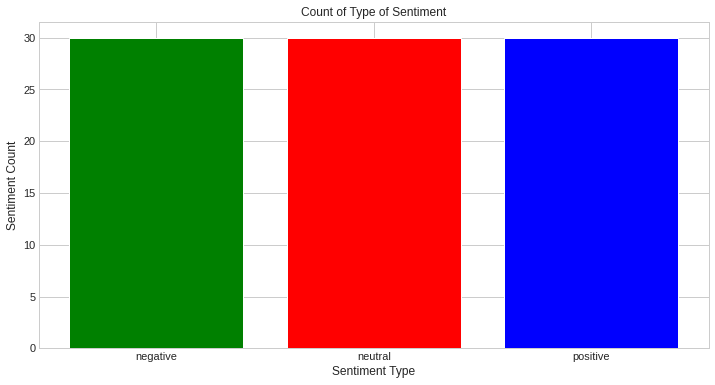

In [ ]:
counter = train.is_business_account.value_counts()
index = [1,2,3]
plt.figure(1,figsize=(12,6))
plt.bar(index,counter,color=['green','red','blue'])
plt.xticks(index,['negative','neutral','positive'],rotation=0)
plt.xlabel('Sentiment Type')
plt.ylabel('Sentiment Count')
plt.title('Count of Type of Sentiment')

**Category_name sentiments for each category**

In [ ]:
#Checking different category we have
test['category_name'].unique()

array(['เว็บบล็อกส่วนตัว', 'Entrepreneur', nan, 'Fanseite',
       'Blog personal', 'প্রোডাক্ট/পরিষেবা', 'Shopping & retail',
       'Scientist', 'Community', 'Writer', 'Athlete', 'कलाकार',
       'Photographer', 'General Dentist', 'Figura pública', 'Artiste',
       'Video creator', 'Personal blog'], dtype=object)

Total number of posts for each category_name 
  category_name
Blog personal        2
Community            2
Artiste              1
Scientist            1
প্রোডাক্ট/পরিষেবা    1
कलाकार               1
Writer               1
Video creator        1
Shopping & retail    1
Personal blog        1
Photographer         1
Athlete              1
General Dentist      1
Figura pública       1
Fanseite             1
Entrepreneur         1
เว็บบล็อกส่วนตัว     1
Name: is_professional_account, dtype: int64


/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2325 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2354 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2366 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2352 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 2325 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 2354 missing from current font.
  font.set_text(s, 

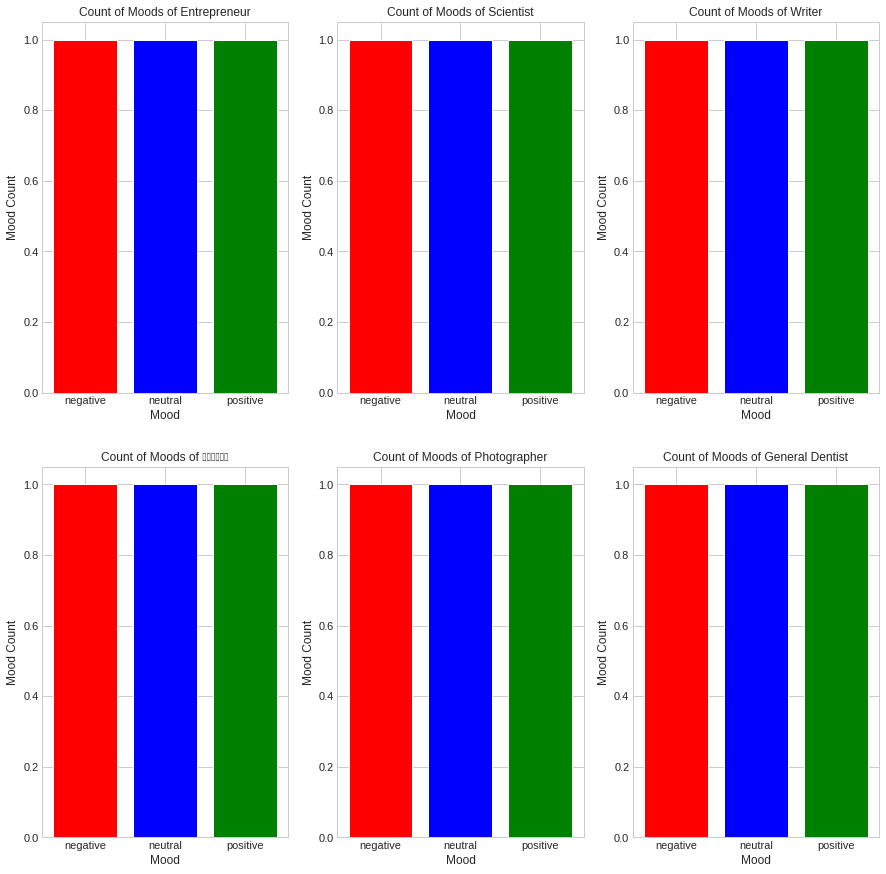

In [ ]:
print("Total number of posts for each category_name \n ",test.groupby('category_name')['is_professional_account'].count().sort_values(ascending=False))
category_name= ['Entrepreneur','Scientist','Writer','कलाकार','Photographer','General Dentist']
plt.figure(1,figsize=(15, 15))
for i in category_name:
    indices= category_name.index(i)
    plt.subplot(2,3,indices+1)
    new_df=test[test['category_name']==i]
    count=new_df['is_professional_account'].value_counts()
    Index = [1,2,3]
    plt.bar(Index,count,color=['red','blue','green'])
    plt.xticks(Index,['negative','neutral','positive'])
    plt.ylabel('Mood Count')
    plt.xlabel('Mood')
    plt.title('Count of Moods of '+i)

Looks like user are not having pleasant posts these year. It is important to know which category pleases their posts the most and vice versa, so we sill be looking at the percentage of the negative posts for each category

                 Percent Negative
Entrepreneur                  1.0
Scientist                     2.0
Writer                        0.5
कलाकार                        0.5
Photographer                  1.0
General Dentist               1.0


/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2325 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2354 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2366 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2352 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 2325 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 2354 missing from current font.
  font.set_text(s, 

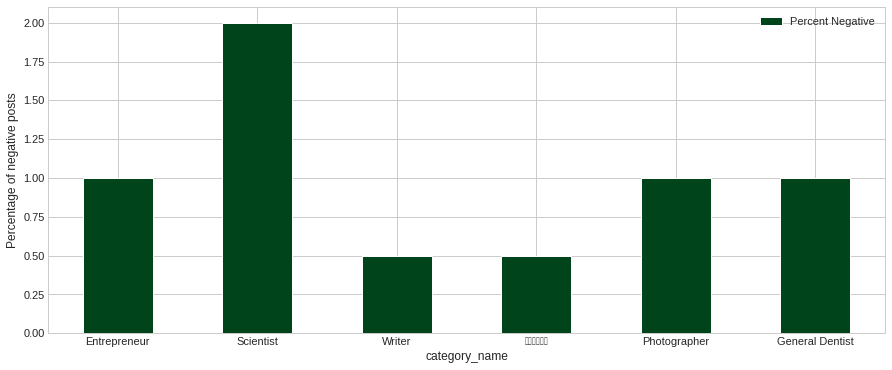

In [ ]:
neg_posts = test.groupby(['category_name','is_professional_account']).count().iloc[:,0]
total_posts = test.groupby(['category_name'])['is_professional_account'].count()

my_dict = {'Entrepreneur':neg_posts[0] / total_posts[0],'Scientist':neg_posts[3] / total_posts[1],'Writer': neg_posts[6] / total_posts[2],
'कलाकार': neg_posts[9] / total_posts[3],'Photographer': neg_posts[12] / total_posts[4],'General Dentist': neg_posts[15] / total_posts[5]}
perc = pd.DataFrame.from_dict(my_dict, orient = 'index')
perc.columns = ['Percent Negative']
print(perc)
ax = perc.plot(kind = 'bar', rot=0, colormap = 'Greens_r', figsize = (15,6))
ax.set_xlabel('category_name')
ax.set_ylabel('Percentage of negative posts')
plt.show()


*   Scientist, Entrepreneur, Photographer, General Dentist substantially get negative reactions.
*   Posts for Writer and Kalakar are the most balanced.

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2474 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2509 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2480 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2507 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2465 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2494 missing from current font.
  font.set_text(s

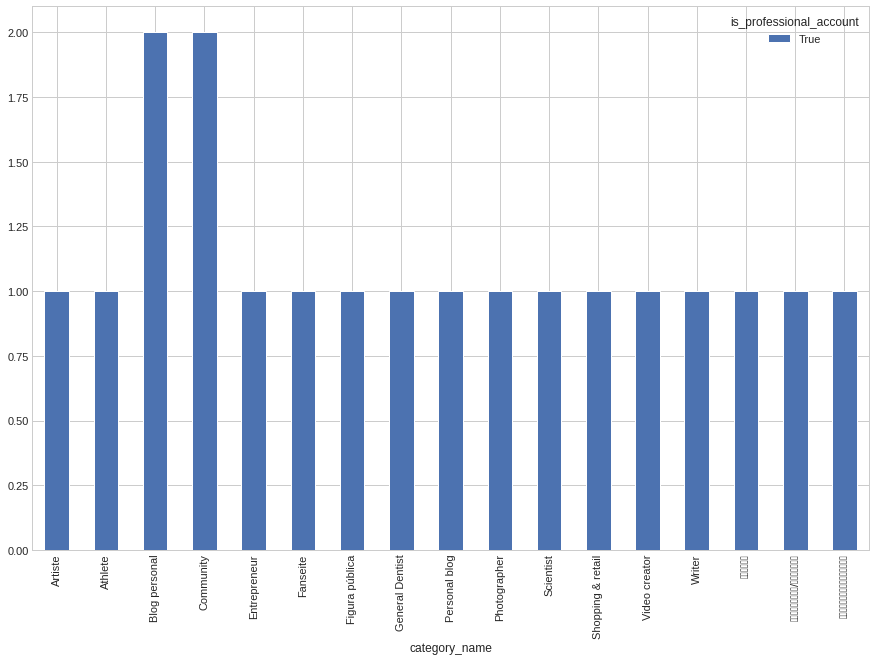

In [ ]:
figure_2 = test.groupby(['category_name', 'is_professional_account']).size()
figure_2.unstack().plot(kind='bar', stacked=True, figsize=(15,10))

In [ ]:
print(figure_2)

category_name      is_professional_account
Artiste            True                       1
Athlete            True                       1
Blog personal      True                       2
Community          True                       2
Entrepreneur       True                       1
Fanseite           True                       1
Figura pública     True                       1
General Dentist    True                       1
Personal blog      True                       1
Photographer       True                       1
Scientist          True                       1
Shopping & retail  True                       1
Video creator      True                       1
Writer             True                       1
कलाकार             True                       1
প্রোডাক্ট/পরিষেবা  True                       1
เว็บบล็อกส่วนตัว   True                       1
dtype: int64


**Last but not least, user posts for many reasons about their category; 10+ reasons to be specific**

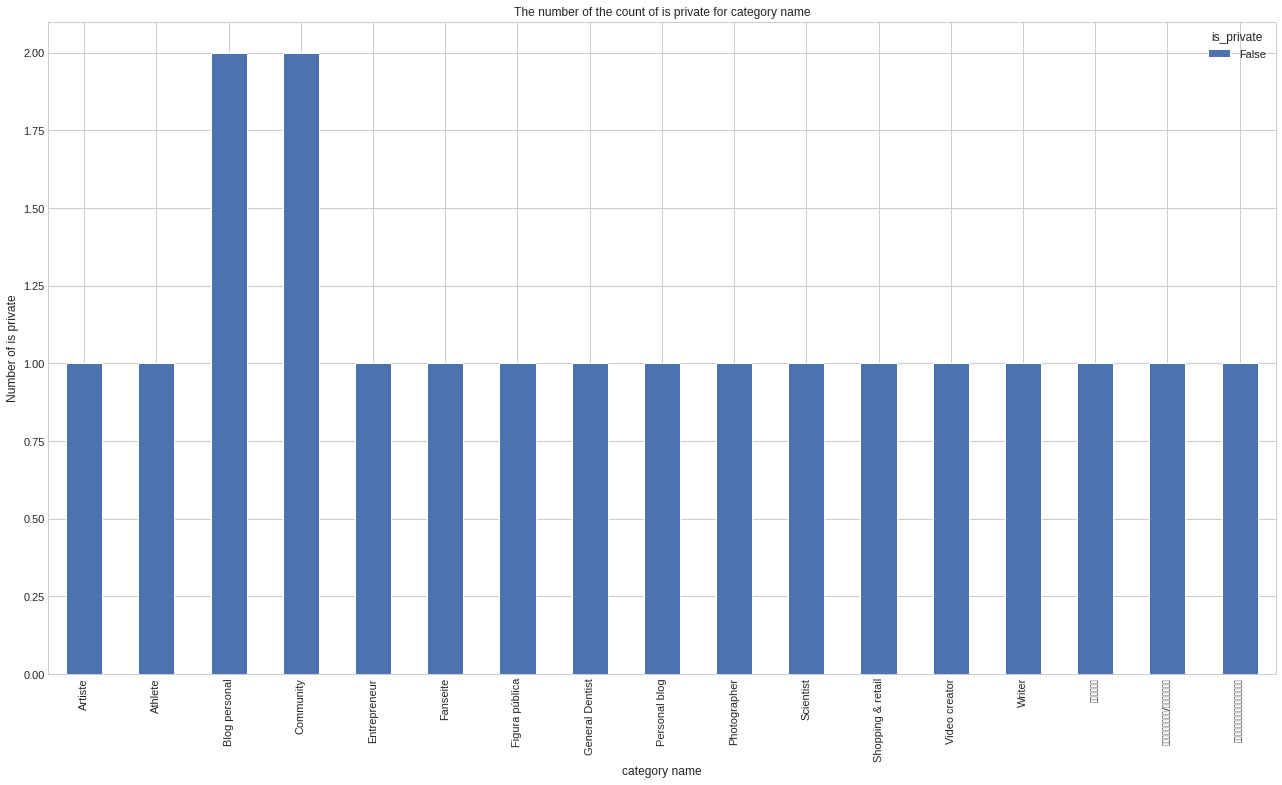

In [ ]:
is_private = test.groupby('category_name')['is_private'].value_counts(ascending=True)
is_private.groupby(['category_name','is_private']).sum().unstack().plot(kind='bar',figsize=(22,12))
plt.xlabel('category name')
plt.ylabel('Number of is private')
plt.title("The number of the count of is private for category name")
plt.show()

**What are the reasons for negative sentimental posts for each category ?**


We will explore the negative reason column of our dataframe to extract conclusions about negative sentiments in the posts by the user

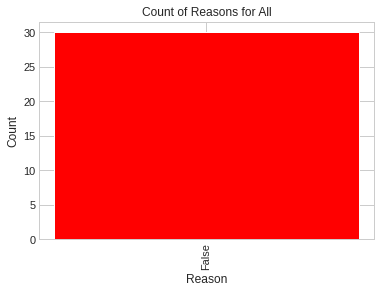

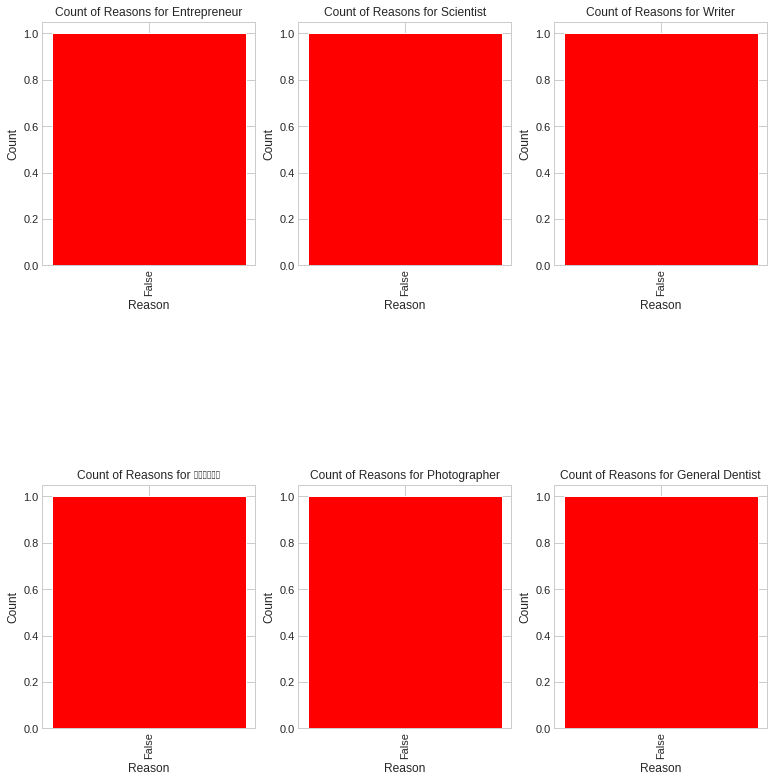

In [ ]:
#get the number of negative reasons
test['is_verified'].nunique()

NR_Count=dict(test['is_verified'].value_counts(sort=False))
def NR_Count(Category_name):
    if Category_name=='All':
        a=test
    else:
        a=test[test['category_name']==Category_name]
    count=dict(a['is_verified'].value_counts())
    Unique_reason=list(test['is_verified'].unique())
    Unique_reason=[x for x in Unique_reason if str(x) != 'nan']
    Reason_frame=pd.DataFrame({'Reasons':Unique_reason})
    Reason_frame['count']=Reason_frame['Reasons'].apply(lambda x: count[x])
    return Reason_frame
def plot_reason(Category_name):

    a=NR_Count(Category_name)
    count=a['count']
    Index = range(1,(len(a)+1))
    plt.bar(Index,count, color=['red','yellow','blue','green','black','brown','gray','cyan','purple','orange'])
    plt.xticks(Index,a['Reasons'],rotation=90)
    plt.ylabel('Count')
    plt.xlabel('Reason')
    plt.title('Count of Reasons for '+Category_name)

plot_reason('All')
plt.figure(2,figsize=(13, 13))
for i in category_name:
    indices= category_name.index(i)
    plt.subplot(2,3,indices+1)
    plt.subplots_adjust(hspace=0.9)
    plot_reason(i)


*   **False is the main negative reason for category**

**Is there a relationship between negative sentiments and date?**

It will be interesting to see if the date has any effect on the sentiments of the posts(especially negative !). We can draw various coclusions by visualizing this.

In [ ]:
date = test.reset_index()
#convert the Date column to pandas datetime
date.timestamp = pd.to_datetime(date.timestamp)
#Reduce the dates in the date column to only the date and no time stamp using the 'dt.date' method
date.timestamp = date.timestamp.dt.date
date.timestamp.head()
test = date
post_test = test.groupby(['timestamp','category_name','is_private']).size()
# post_test = posts_test.reset_index()
post_test

timestamp   category_name      is_private
2022-09-11  Artiste            False         1
            Blog personal      False         1
            Community          False         1
            Video creator      False         1
            প্রোডাক্ট/পরিষেবা  False         1
2022-09-12  Blog personal      False         1
2022-09-18  Photographer       False         1
2022-09-22  Athlete            False         1
            Community          False         1
            Entrepreneur       False         1
            Fanseite           False         1
            Figura pública     False         1
            General Dentist    False         1
            Personal blog      False         1
            Scientist          False         1
            Shopping & retail  False         1
            Writer             False         1
            कलाकार             False         1
            เว็บบล็อกส่วนตัว   False         1
dtype: int64

plot this and get better visualization for negative posts.

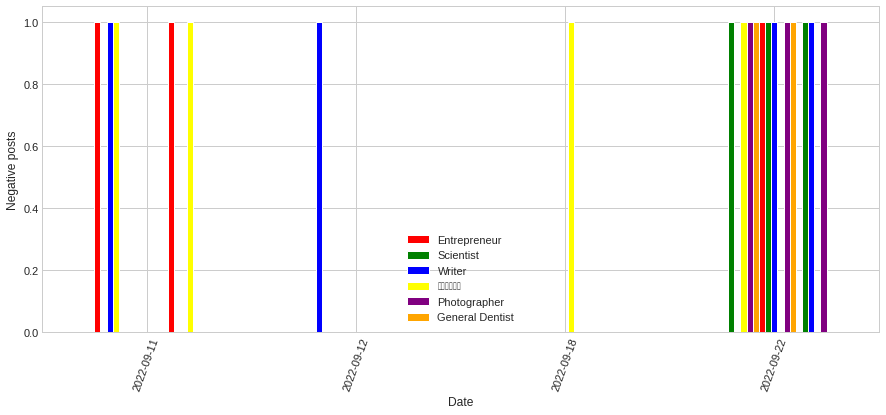

In [ ]:
post_test = post_test.loc(axis=0)[:,:,]
#groupby and plot data

ax2 = post_test.groupby(['timestamp','category_name']).sum().unstack().plot(kind = 'bar', color=['red', 'green', 'blue','yellow','purple','orange'], figsize = (15,6), rot = 70)
labels = ['Entrepreneur','Scientist','Writer','कलाकार','Photographer','General Dentist']
ax2.legend(labels = labels)
ax2.set_xlabel('Date')
ax2.set_ylabel('Negative posts')
plt.show()


*   Interestingly, category has a sudden upsurge in negative sentimental posts on 2022-09-22, which reduced to 1/nth the very next day 2022-09-18. (I hope kalakar is doing better this year and resolved their User posts Issue as we saw before)




**Wordcloud for positive reasons**

In [ ]:
import os

from os import path
from wordcloud import WordCloud


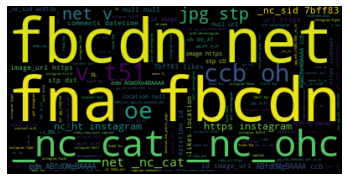

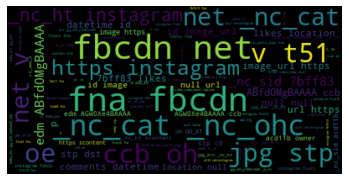

In [ ]:
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

text = open(path.join(d, '/content/test.csv')).read()

wordcloud = WordCloud().generate(text)

import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

wordcloud = WordCloud(max_font_size=40).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

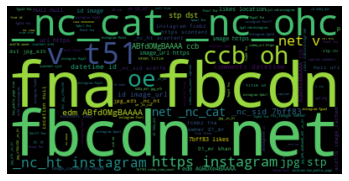

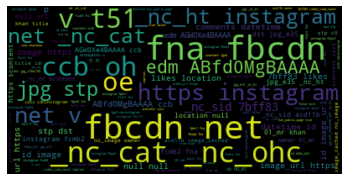

In [ ]:
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

text = open(path.join(d, "/content/train.csv")).read()

wordcloud = WordCloud().generate(text)

import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

wordcloud = WordCloud(max_font_size=40).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

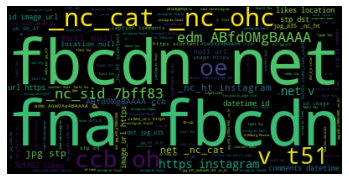

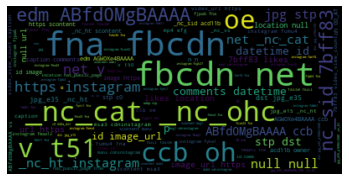

In [ ]:
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

text = open(path.join(d, '/content/valid.csv')).read()

wordcloud = WordCloud().generate(text)

import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

wordcloud = WordCloud(max_font_size=40).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

**Dropng the rows with neutral sentiments**

In [ ]:
valid.drop(valid.loc[valid['is_leading_business']=='neutral'].index, inplace=True)

**label encoding on is_leading_business**

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(valid['is_leading_business'])

valid['business_email'] = le.transform(valid['is_leading_business'])
valid.head()

,timestamp,account,fbid,id,followers,posts_count,following,profile_image_link,highlights_count,profile_name,...,category_name,category_enum,is_business_account,is_professional_account,is_verified,business_email,business_address_json,is_private,is_leading_business,is_music
0,2022-09-22,057755ssssddddd,17841400889192382,1432477639,120,172,408,https://scontent-dub4-1.cdninstagram.com/v/t51...,0,عبدالعزيز الهذلي,...,NaN,NaN,False,False,False,0,NaN,False,NaN,NaN
1,2022-09-22,05777zm,17841400987734300,915232924,85,153,413,https://instagram.fdps5-1.fna.fbcdn.net/v/t51....,0,ТЫ+Я=♥♡♥♡♥♡♥,...,NaN,NaN,False,False,False,0,NaN,True,NaN,NaN
2,2021-10-06,0577dali,17841430410481925,30415405682,65,194,393,https://scontent-lhr8-1.cdninstagram.com/v/t51...,0,NaN,...,NaN,NaN,False,False,False,0,NaN,True,NaN,NaN
3,2022-09-22,0577jipsy,17841401327487641,1129068249,564,143,2445,https://instagram.fmex4-2.fna.fbcdn.net/v/t51....,0,Jipsy Hernandez,...,NaN,NaN,False,False,False,0,NaN,False,NaN,NaN
4,2022-09-22,0577mobile_,17841406773345686,6765489778,780,288,5876,https://instagram.fqrc1-1.fna.fbcdn.net/v/t51....,0,ابورامي,...,NaN,NaN,False,False,False,0,NaN,False,NaN,NaN


**Preprocessing the tweet text data**

Now, we will clean the posts text data and apply classification algorithms on it

In [ ]:
def posts_to_words(posts):
    letters_only = re.sub("[^a-zA-Z]", " ",posts)
    words = letters_only.lower().split()
    stops = set(stopwords.words("english"))
    meaningful_words = [w for w in words if not w in stops]
    return( " ".join( meaningful_words ))

In [ ]:
import re
import csv

In [ ]:
fileLocation = '/content/test.csv'
cList = {
  "ain't": "am not",
  "aren't": "are not",
  "can't": "cannot",
  "can't've": "cannot have",
  "'cause": "because",
  "could've": "could have",
  "couldn't": "could not",
  "couldn't've": "could not have",
  "didn't": "did not",
  "doesn't": "does not",

        }
R = re.compile('(%s)' % '|'.join(cList.keys()),re.IGNORECASE)
read = csv.reader(open(fileLocation))
aList = []
def expandContractions(text,R=R):
    def replace(match):
        return cList[match.group(0)]
    return R.sub(replace, text)
for i in read:
    aList.append(i[5])
for j in aList:
    print(expandContractions(j))

posts_count
115
58
4
39
388
643
96
1002
0
228
743
0
1
1
2
140
13
133
0
4
5
43
0
11
126
1038
8
2
81
940


In [ ]:
fileLocation = '/content/train.csv'
cList = {
  "ain't": "am not",
  "aren't": "are not",
  "can't": "cannot",
  "can't've": "cannot have",
  "'cause": "because",
  "could've": "could have",
  "couldn't": "could not",
  "couldn't've": "could not have",
  "didn't": "did not",
  "doesn't": "does not",

        }
R = re.compile('(%s)' % '|'.join(cList.keys()),re.IGNORECASE)
read = csv.reader(open(fileLocation))
aList = []
def expandContractions(text,R=R):
    def replace(match):
        return cList[match.group(0)]
    return R.sub(replace, text)
for i in read:
    aList.append(i[5])
for j in aList:
    print(expandContractions(j))

posts_count
5
2
17
22
34
35
2
127
13
588
3
280
0
0
0
3
22
6
25
48
1
104
265
43
130
7
18
0
15
6


In [ ]:
fileLocation = '/content/valid.csv'
cList = {
  "ain't": "am not",
  "aren't": "are not",
  "can't": "cannot",
  "can't've": "cannot have",
  "'cause": "because",
  "could've": "could have",
  "couldn't": "could not",
  "couldn't've": "could not have",
  "didn't": "did not",
  "doesn't": "does not",

        }
R = re.compile('(%s)' % '|'.join(cList.keys()),re.IGNORECASE)
read = csv.reader(open(fileLocation))
aList = []
def expandContractions(text,R=R):
    def replace(match):
        return cList[match.group(0)]
    return R.sub(replace, text)
for i in read:
    aList.append(i[5])
for j in aList:
    print(expandContractions(j))

posts_count
172
153
194
143
288
113
212
148
147
1131
330
106
125
116
278
210
1006
176
257
102
418
148
714
904
399
115
191
124
826
250


**Vectorization**



In [ ]:
x = valid.is_leading_business
y = valid.is_music

print(len(x), len(y))

30 30


**The data is split in the standard 0.22,0.08 ratio**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)
print(len(x_valid), len(y_train))
print(len(x_test), len(y_test))

22 22
8 8


In [ ]:
test = pd.read_csv("/content/test.csv", skiprows=1)

for col in test:
    var1 = test.var()

<ipython-input-175-764ed7b525f6>:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  var1 = test.var()


In [ ]:
train = pd.read_csv("/content/train.csv", skiprows=1)

for col in train:
    var1 = train.var()

<ipython-input-184-acd3d30be6d9>:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  var1 = train.var()


In [ ]:
valid = pd.read_csv("/content/valid.csv", skiprows=1)

for col in valid:
    var1 = valid.var()

<ipython-input-185-31b66c091a9b>:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  var1 = valid.var()


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# instantiate the vectorizer
vect = CountVectorizer()
vect.fit(valid)

CountVectorizer()

In [ ]:
vect = CountVectorizer()
vect.fit(test)

CountVectorizer()

In [ ]:
vect = CountVectorizer()
vect.fit(train)

CountVectorizer()

In [ ]:
# Use the trained to create a document-term matrix from train and test sets
x_train_dtm = vect.transform(train)
x_test_dtm = vect.transform(test)

In [ ]:
train_dtm = vect.transform(train)
test_dtm = vect.transform(test)
valid_dtm = vect.transform(valid)

In [ ]:
vect_tunned = CountVectorizer(stop_words='english', ngram_range=(1,2), min_df=0.1, max_df=0.7, max_features=100)
vect_tunned

CountVectorizer(max_df=0.7, max_features=100, min_df=0.1, ngram_range=(1, 2),
                stop_words='english')

**Model Building**

In [ ]:
#accuracy score
X, Y = load_iris(return_X_y = True)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

svc = SVC()
svc.fit(X_train, Y_train)

Y_pred = svc.predict(X_test)
score = accuracy_score(Y_test, Y_pred)
print(score)

0.9777777777777777


**Thank You**